In [1]:
import limpy.lines as ll
import limpy.theory as lt
import limpy.utils as lu
import limpy.inputs as inp
import limpy.cosmos as cosmos

import numpy as np

<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111


In [2]:
def configure_params_fisher(params_fisher, line_name = "CII158", step_size=50):

    steps = {key: value / step_size for key, value in params_fisher.items()}
    
    return params_fisher, steps

In [3]:
params_fisher ={
            "omega_m": 0.3,
            "sigma_8": 0.8}

params_fisher_input, steps = configure_params_fisher(params_fisher)

for i in range(2):
        p=list(params_fisher.keys())[i]
        print("varying :", p)
        params_deriv = params_fisher.copy()	
        params_deriv[p] = params_deriv[p] + steps[p]

varying : omega_m
varying : sigma_8


In [4]:
def compute_derivatives_pk3d_analytical(
                      k_values,
                      z,
                      params_fisher, 
                      line_name='CII158',
                      sfr_model="Silva15",
                      model_name ="Alma_scalling"):
    

    param_numbers=len(params_fisher)
    dcldp=[]
    
    for i in range(param_numbers):
        p=list(params_fisher.keys())[i]
        print("varying :", p)
        params_deriv = params_fisher.copy()	
        params_deriv[p] = params_deriv[p] + steps[p]
        
        Pk_line(self, k, z, line_name="CII158",
                label="total",
                sfr_model="Silva15", 
                model_name="Silva15-m1", 
                pk_unit="intensity", 
                HOD_model=False,
                params_fisher=None)


        lim_theory = lt.theory(parameters=params_deriv)
        pk_plus = lim_theoryPk_line(k_values, z, model_name=model_name, line_name=line_name,
                             sfr_model =sfr_model)
        
        
    
        del params_deriv
        del updated_params
        
        
        
        
        params_deriv = params_fisher.copy()
        params_deriv[p] = params_deriv[p] - steps[p] 
        
        lim_theory = lt.theory(parameters=params_deriv)
        
        pk_minus = lim_theory.Pk_line(k_values, z, model_name=model_name, line_name=line_name,
                             sfr_model =sfr_model)
        
        
        dcldp_cal=(pk_plus - pk_minus)/ (2. * steps[p])
        dcldp.append(dcldp_cal)
        
        del params_deriv
        
    return dcldp
        

    
    

In [5]:
def fisher_pk3d(k_values,
                      z,
                      params_fisher,
                      derivative_matrix=None,
                      cov_matrix=None,
                      line_name='CII158',
                      sfr_model="Silva15",
                      model_name ="Alma_scalling"):
    
    # This function calculates the fisher matrix for a given covariance matrix. If derivative is precomputed
    # it can can be passed as an input, otherwise, the code will calculate the derivative. 
    
    
    if derivative_matrix is None:
        print("Calculating derivative")
        derivative = compute_derivatives_pk3d_analytical(
                      k_values,
                      z,
                      params_fisher, 
                      line_name= line_name,
                      sfr_model= sfr_model,
                      model_name = model_name)
        
    else:
        derivative = derivative_matrix
        
    
    nparams=len(params_fisher)
    F=np.zeros((nparams, nparams))
    clderiv_i = derivative
    clderiv_j = derivative
    

    for i in range(nparams):
        for j in range(nparams):
            F[i][j]=np.sum(clderiv_i[i]* cov_matrix**-1 * clderiv_j[j]) 
            
    return F

In [6]:
def get_gaussian_error(pk_error, k):
    covariance_matrix = pk_error ** 2
    return covariance_matrix

In [11]:
cosmo_setup = cosmos.cosmo()
kvals = np.logspace(-1, 1, num=20)
z = 4.6

lim_theory = ll.theory(parameters=None)


pk = lim_theory.Pk_line(kvals, z, model_name="Alma_scalling")


pk1 = lim_theory.Pk_line(kvals, 3.6, model_name="Alma_scalling")

<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
6.98 0.99
6.98 0.99
6.98 0.99
6.98 0.99
6.98 0.99
6.98 0.99


In [12]:
params_fisher ={
            "omega_m": 0.3,
            "sigma_8": 0.8}

params_fisher_input, steps = configure_params_fisher(params_fisher)


<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
6.98 0.99
6.98 0.99
6.98 0.99
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
6.98 0.99
6.98 0.99
6.98 0.99


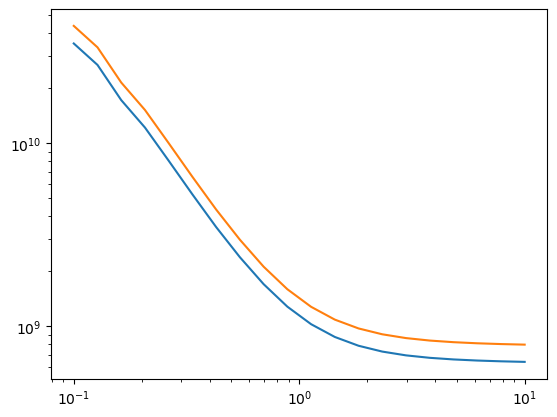

In [17]:

lim_theory = ll.theory(parameters={"sigma_8":0.8})
pk = lim_theory.Pk_line(kvals, z, model_name="Alma_scalling")


lim_theory = ll.theory(parameters={"sigma_8":0.83})
pk1 = lim_theory.Pk_line(kvals, z, model_name="Alma_scalling")


import matplotlib.pyplot as plt
plt.loglog(kvals, pk)
plt.loglog(kvals, pk1)

In [18]:
cov_mat = get_gaussian_error(pk_err, kvals)

NameError: name 'pk_err' is not defined

In [19]:
Fij = fisher_pk3d(kvals,
                      z,
                      params_fisher_input,
                      derivative_matrix=None,
                      cov_matrix=cov_mat,
                      line_name='CII158',
                      sfr_model="Silva15",
                      model_name ="Alma_scalling")

NameError: name 'cov_mat' is not defined

In [20]:
cov_params = np.linalg.inv(Fij)

params_fisher_names= list(params_fisher_input.keys())

params_label=params_fisher_names
params_fisher_names_plot=params_fisher_names

mean=[params_fisher[params_fisher_names_plot[i]] for i in range(len(params_fisher_names_plot))]


NameError: name 'Fij' is not defined

In [21]:
from chainconsumer import ChainConsumer


c = ChainConsumer()


colors=[ '#C59A06', '#046DD0', '#C70039', 'green', 'm', 'orange', 'brown', 'magenta']


c.add_covariance(mean, cov_params, parameters=params_label)


fig = c.plotter.plot(figsize=(8,8), truth=[6.98, 0.99])
fig.set_size_inches(3+ fig.get_size_inches()) 


#plt.savefig("fisher_lim.png")

AttributeError: 'ChainConsumer' object has no attribute 'add_covariance'

In [43]:
def pk3d_interloper(k, 
                        line_name='CII158',
                        sfr_model="Silva15",
                        model_name="Alma_scalling",
                        params_fisher=None,
                        nu_obs=410, 
                        dnu_obs=40,
                        zlim=10):
    
    z_int, dz_int, int_line_names = lu.get_lines_same_frequency(int_line_list, 
                                                               nu_obs=nu_obs,
                                                               dnu_obs=dnu_obs, 
                                                               zlim=zlim)
    pk_total = []
    
    for i, z in enumerate(z_int):
        print("Calculating powerspectrum for {:s} lines at z={:.2f}".format(int_line_names[i], z))
        pk_int = lt.Pk_line(k, z, model_name=model_name, line_name=line_name,
                            sfr_model=sfr_model, params_fisher=params_fisher)
        pk_total.append(pk_int)
        
    pk_final = np.sum(pk_total, axis=0)
        
    return pk_final

    
    
    
    

In [42]:
pkint = pk3d_interloper(kvals, 
                      line_name='CO32',
                      sfr_model="Silva15",
                      model_name ="Alma_scalling",
                      params_fisher=None,
                      nu_obs=410, 
                      dnu_obs=40,
                      zlim=10)

Calculating powerspectrum for CII158 lines at z=3.63
Calculating powerspectrum for CO43 lines at z=0.12
Calculating powerspectrum for CO54 lines at z=0.40
Calculating powerspectrum for CO65 lines at z=0.68
Calculating powerspectrum for CO76 lines at z=0.96
Calculating powerspectrum for CO87 lines at z=1.24
Calculating powerspectrum for CO98 lines at z=1.52
Calculating powerspectrum for CO109 lines at z=1.80
Calculating powerspectrum for CO1110 lines at z=2.08
Calculating powerspectrum for CO1211 lines at z=2.36
Calculating powerspectrum for CO1312 lines at z=2.64
Calculating powerspectrum for OIII88 lines at z=7.31


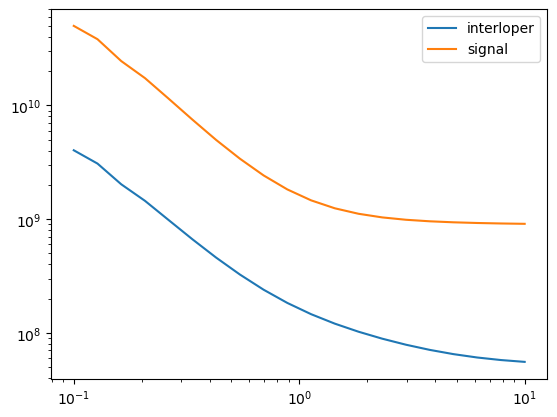

In [44]:
plt.plot(kvals, pkint, label="interloper")
plt.loglog(kvals, pk1, label="signal")

plt.legend(loc=0)

In [45]:
def compute_derivatives_pk3d_interlopers(
                      k_values,
                      z,
                      params_fisher, 
                      line_name='CII158',
                      sfr_model="Silva15",
                      model_name ="Alma_scalling",
                      nu_obs=410, 
                      dnu_obs=40,
                      zlim=10):
    
    
    param_numbers=len(params_fisher)
    dcldp=[]
    
    for i in range(param_numbers):
        p=list(params_fisher.keys())[i]
        print("varying :", p)
        params_deriv = params_fisher.copy()	
        params_deriv[p] = params_deriv[p] + steps[p]
        
        updated_params = {
        key: params_deriv[key] if key in params_deriv else cosmo_params_inputs[key]
        for key in cosmo_params_inputs}
        
        cosmo_setup = cosmos.cosmo(h = updated_params['h'],
                                    omega_lambda = updated_params['omega_lambda'],
                                    omega_b = updated_params['omega_b'],
                                    omega_m = updated_params['omega_m'],
                                    tau = updated_params['tau'],
                                    ns = updated_params['ns'],
                                    sigma_8 = updated_params['sigma_8'],
                                    halo_model = updated_params['halo_model'],
                                    halo_mass_def = updated_params['halo_mass_def'],
                                    M_min = updated_params['M_min'],
                                    M_max = updated_params['M_max'],
                                    delta_c = updated_params['delta_c'],
                                    bias_model = updated_params['bias_model'],
                                    bias_mass_def = updated_params['bias_mass_def'])


        
        pk_plus =  pk3d_interloper(k_values,
                                 model_name=model_name,
                                 line_name=line_name,
                                 sfr_model =sfr_model, 
                                 params_fisher=params_deriv,
                                 nu_obs= nu_obs, 
                                 dnu_obs = dnu_obs,
                                 zlim= zlim)

        
        del params_deriv
        del updated_params
        
        
        
        
        params_deriv = params_fisher.copy()
        params_deriv[p] = params_deriv[p] - steps[p] 
        
        updated_params = {
        key: params_deriv[key] if key in params_deriv else cosmo_params_inputs[key]
        for key in cosmo_params_inputs}
        
        cosmo_setup = cosmos.cosmo(h = updated_params['h'],
                                    omega_lambda = updated_params['omega_lambda'],
                                    omega_b = updated_params['omega_b'],
                                    omega_m = updated_params['omega_m'],
                                    tau = updated_params['tau'],
                                    ns = updated_params['ns'],
                                    sigma_8 = updated_params['sigma_8'],
                                    halo_model = updated_params['halo_model'],
                                    halo_mass_def = updated_params['halo_mass_def'],
                                    M_min = updated_params['M_min'],
                                    M_max = updated_params['M_max'],
                                    delta_c = updated_params['delta_c'],
                                    bias_model = updated_params['bias_model'],
                                    bias_mass_def = updated_params['bias_mass_def'])
        
        
        
        pk_minus = pk3d_interloper(k_values,
                                                 model_name=model_name,
                                                 line_name=line_name,
                                                 sfr_model =sfr_model, 
                                                 params_fisher=params_deriv,
                                                 nu_obs= nu_obs, 
                                                 dnu_obs = dnu_obs,
                                                 zlim= zlim)
        
        
        dcldp_cal=(pk_plus - pk_minus)/ (2. * steps[p])
        dcldp.append(dcldp_cal)
        
        del params_deriv
        
    return dcldp
        

    
    

In [46]:
def fisher_pk3d_interoper(k_values,
                      z,
                      params_fisher,
                      derivative_matrix=None,
                      cov_matrix=None,
                      line_name='CII158',
                      sfr_model="Silva15",
                      model_name ="Alma_scalling",
                      nu_obs=410, 
                      dnu_obs=40,
                      zlim=10):
    
    # This function calculates the fisher matrix for a given covariance matrix. If derivative is precomputed
    # it can can be passed as an input, otherwise, the code will calculate the derivative. 
    
    
    if derivative_matrix is None:
        print("Calculating derivative")
        derivative = compute_derivatives_pk3d_interlopers(
                      k_values,
                      z,
                      params_fisher, 
                      line_name= line_name,
                      sfr_model= sfr_model,
                      model_name = model_name,
                      nu_obs = nu_obs, 
                      dnu_obs = dnu_obs,
                      zlim = zlim)
        
    else:
        derivative = derivative_matrix
        
    
    nparams=len(params_fisher)
    F=np.zeros((nparams, nparams))
    clderiv_i = derivative
    clderiv_j = derivative
    

    for i in range(nparams):
        for j in range(nparams):
            F[i][j]=np.sum(clderiv_i[i]* cov_matrix**-1 * clderiv_j[j]) 
            
    return F

In [30]:
params_fisher = {#"a_off": 7,
                 #"b_off": 0.99,
                 'h': 0.6776,
                
                 'omega_m': 0.3111}

params_fisher_input, steps = configure_params_fisher(params_fisher)


In [48]:
cosmo_setup = cosmos.cosmo(sigma_8 =0.85)
pk1 = lt.Pk_line(kvals, z, model_name="Alma_scalling", params_fisher=params_fisher_input)
pk_err = 0.1 * pk1

In [58]:
Fij = fisher_pk3d(kvals,
                      z,
                      params_fisher_input,
                      derivative_matrix=None,
                      cov_matrix=cov_mat,
                      line_name='CII158',
                      sfr_model="Silva15",
                      model_name ="Alma_scalling")

Calculating derivative
varying : h
varying : omega_lambda
varying : omega_b
varying : omega_m
varying : ns
varying : sigma_8


In [51]:
Fij_int = fisher_pk3d_interoper(kvals,
                      z,
                      params_fisher_input,
                      derivative_matrix=None,
                      cov_matrix=cov_mat,
                      line_name='CII158',
                      sfr_model="Silva15",
                      model_name ="Alma_scalling")

Calculating derivative
varying : h
Calculating powerspectrum for CII158 lines at z=3.63
Calculating powerspectrum for CO43 lines at z=0.12
Calculating powerspectrum for CO54 lines at z=0.40
Calculating powerspectrum for CO65 lines at z=0.68
Calculating powerspectrum for CO76 lines at z=0.96
Calculating powerspectrum for CO87 lines at z=1.24
Calculating powerspectrum for CO98 lines at z=1.52
Calculating powerspectrum for CO109 lines at z=1.80
Calculating powerspectrum for CO1110 lines at z=2.08
Calculating powerspectrum for CO1211 lines at z=2.36
Calculating powerspectrum for CO1312 lines at z=2.64
Calculating powerspectrum for OIII88 lines at z=7.31
Calculating powerspectrum for CII158 lines at z=3.63
Calculating powerspectrum for CO43 lines at z=0.12
Calculating powerspectrum for CO54 lines at z=0.40
Calculating powerspectrum for CO65 lines at z=0.68
Calculating powerspectrum for CO76 lines at z=0.96
Calculating powerspectrum for CO87 lines at z=1.24
Calculating powerspectrum for CO98

In [59]:
cov_params= np.linalg.inv(Fij)
cov_params_int = np.linalg.inv(Fij_int)

In [60]:
params_fisher_names= list(params_fisher_input.keys())

params_label=params_fisher_names
params_fisher_names_plot=params_fisher_names

mean=[params_fisher[params_fisher_names_plot[i]] for i in range(len(params_fisher_names_plot))]

In [ ]:
cov_params= np.linalg.inv(Fij)
cov_params_int = np.linalg.inv(Fij_int)

params_fisher_names= list(params_fisher_input.keys())

params_label=params_fisher_names
params_fisher_names_plot=params_fisher_names

mean=[params_fisher[params_fisher_names_plot[i]] for i in range(len(params_fisher_names_plot))]

c = ChainConsumer()

#c.add_covariance(mean, cov_params, parameters=params_label)
c.add_covariance(mean, cov_params_int, parameters=params_label)

fig = c.plotter.plot(figsize=(8,8))
fig.set_size_inches(3+ fig.get_size_inches()) 

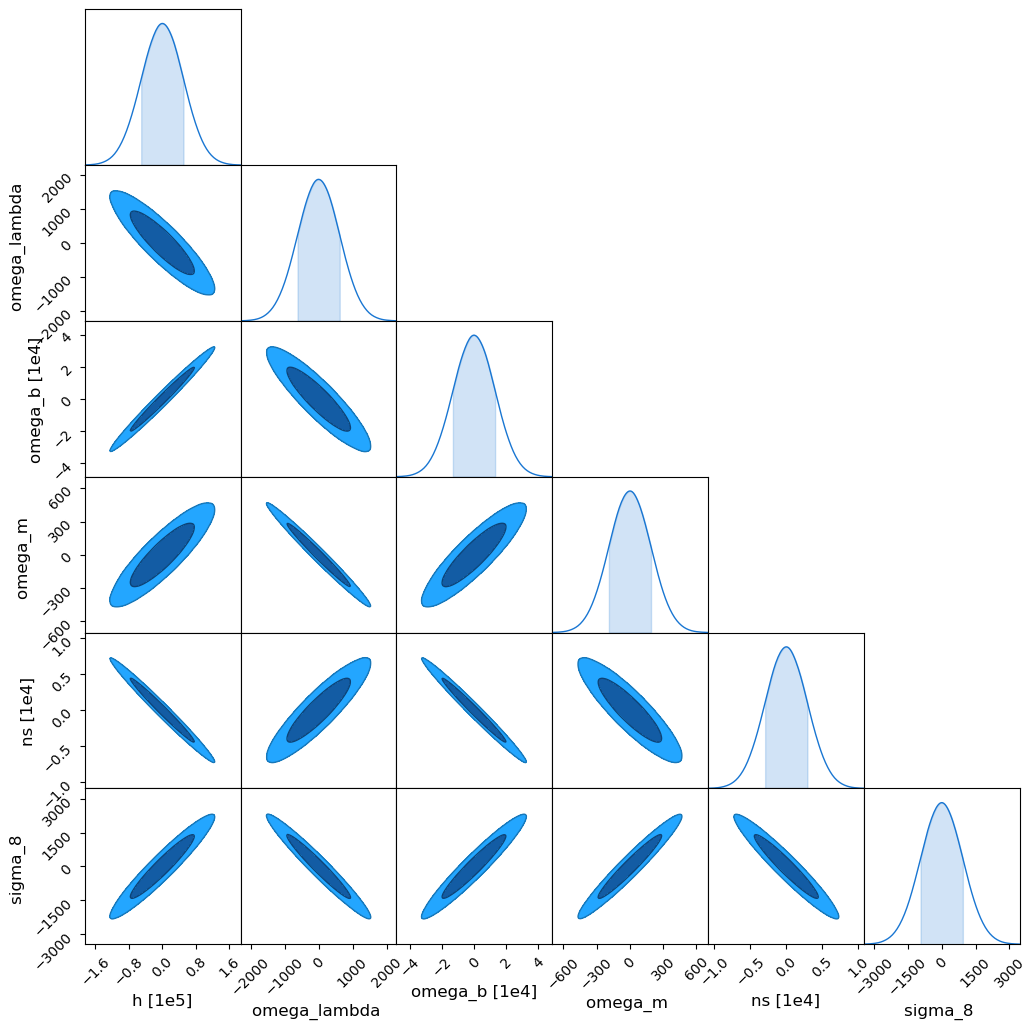

In [61]:
c = ChainConsumer()

#c.add_covariance(mean, cov_params, parameters=params_label)
c.add_covariance(mean, cov_params_int, parameters=params_label)

fig = c.plotter.plot(figsize=(8,8))
fig.set_size_inches(3+ fig.get_size_inches()) 

In [62]:
def get_reduced_fisher(params_fisher, parameters_to_remove, Fij):

    # Find the indices of the parameters to remove
    param_indices_to_remove = [list(params_fisher.keys()).index(param) for param in parameters_to_remove]

    # Remove the rows and columns corresponding to the parameters to remove
    Fij_new = np.delete(Fij, param_indices_to_remove, axis=0)
    Fij_new = np.delete(Fij_new, param_indices_to_remove, axis=1)

    # Get the remaining parameter names
    remaining_parameters = [param for param in params_fisher.keys() if param not in parameters_to_remove]

    # Create a dictionary of remaining parameters with their values
    remaining_parameters_values = {param: params_fisher[param] for param in remaining_parameters}
    
    return Fij_new, remaining_parameters_values




In [63]:
parameters_to_remove = ["omega_lambda", "ns",  "omega_b", "h"]

Fij_int_final, params_final = get_reduced_fisher(params_fisher, parameters_to_remove, Fij_int)

Fij_final, params_final = get_reduced_fisher(params_fisher, parameters_to_remove, Fij)

cov_params= np.linalg.inv(Fij_final)
cov_params_int = np.linalg.inv(Fij_int_final)

params_fisher_names= list(params_final.keys())

params_label = params_fisher_names
params_fisher_names_plot = params_fisher_names

mean=[params_final[params_fisher_names_plot[i]] for i in range(len(params_fisher_names_plot))]

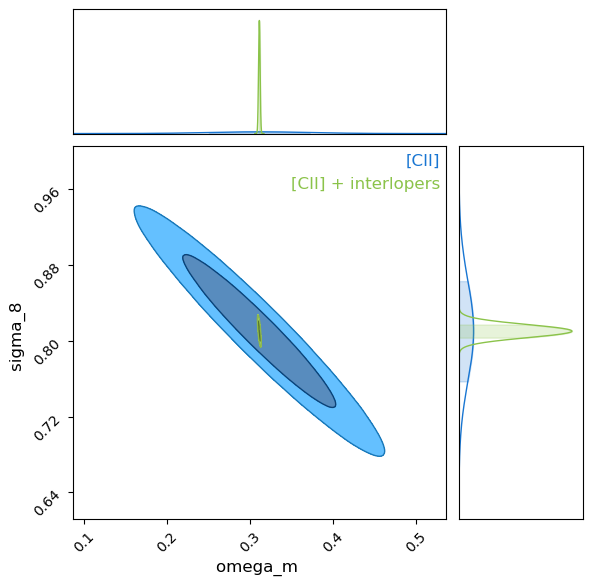

In [64]:
c = ChainConsumer()

c.add_covariance(mean, cov_params, parameters=params_label, name="[CII]")
c.add_covariance(mean, cov_params_int, parameters=params_label, name="[CII] + interlopers")

fig = c.plotter.plot(figsize=(3,3))
fig.set_size_inches(3+ fig.get_size_inches()) 

In [ ]:
params_fisher_names_plot 

In [41]:
int_line_list = [
    "CII158",
    "CO10",
    "CO21",
    "CO32",
    "CO43",
    "CO54",
    "CO65",
    "CO76",
    "CO87",
    "CO98",
    "CO109",
    "CO1110",
    "CO1211",
    "CO1312",
    "OIII88",
]


In [41]:
import limpy.lines as ll
import limpy.theory as lt
import limpy.utils as lu
import limpy.inputs as inp
import limpy.cosmos as cosmos

import numpy as np


class lim_fisher:
    def __init__(self, k_values, z, params_fisher, line_name='CII158', sfr_model="Silva15", model_name="Alma_scalling", step_size=50):
        self.k_values = k_values
        self.z = z
        self.params_fisher = params_fisher
        self.line_name = line_name
        self.sfr_model = sfr_model
        self.model_name = model_name
        self.step_size = step_size

    def configure_params_fisher(self):

        steps = {key: value / self.step_size for key, value in params_fisher.items()}
        
        return params_fisher, steps

    def compute_derivatives_pk3d_analytical(self):
        params_fisher, steps = self.configure_params_fisher()
        param_numbers = len(self.params_fisher)
        dcldp = []

        for i in range(param_numbers):
            p = list(self.params_fisher.keys())[i]
            
            print("varying:", p)
            
            params_deriv = self.params_fisher.copy()
            params_deriv[p] = params_deriv[p] + steps[p]

            lim_theory = ll.theory(parameters=params_deriv)
            pk_plus = lim_theory.Pk_line(self.k_values, self.z, model_name=self.model_name, line_name=self.line_name,
                                         sfr_model=self.sfr_model)

            del lim_theory

            params_deriv = self.params_fisher.copy()
            params_deriv[p] = params_deriv[p] - steps[p]

            lim_theory = ll.theory(parameters=params_deriv)
            pk_minus = lim_theory.Pk_line(self.k_values, self.z, model_name=self.model_name, line_name=self.line_name,
                                          sfr_model=self.sfr_model)

            del lim_theory
            dcldp_cal = (pk_plus - pk_minus) / (2. * steps[p])
            dcldp.append(dcldp_cal)

            del params_deriv

        return dcldp


    def fisher_pk3d(self, cov_matrix, derivative_matrix=None):
        if derivative_matrix is None:
            print("Calculating derivative")
            derivative = self.compute_derivatives_pk3d_analytical()
        else:
            derivative = derivative_matrix

        nparams = len(self.params_fisher)
        F = np.zeros((nparams, nparams))
        clderiv_i = derivative
        clderiv_j = derivative

        for i in range(nparams):
            for j in range(nparams):
                F[i][j] = np.sum(clderiv_i[i] * cov_matrix**-1 * clderiv_j[j])

        return F


    def compute_covariance_params(self, fisher_matrix=None, derivative_matrix=None, cov_matrix=None):

        if fisher_matrix is not None:
            Fij = fisher_mat

        else:
            if derivative_matrix is not None:
                derivative = derivative_matrix
                fisher_pk3d = self.fisher_pk3d(cov_matrix, derivative_matrix= derivative)

            if derivative_matrix is None:
                derivative = self.compute_derivatives_pk3d_analytical()
                fij = self.fisher_pk3d(cov_matrix, derivative_matrix= derivative)

            if (derivative_matrix is None and cov_matrix is None):
                print("error: you should pass cov_matrix in this case. If precomputed derivative_matrix is not passed \
                the code will calculate the derivative matrix. Otherwise, the code will use the precomputed derivative_matrix")

            if (fisher_matrix is None and cov_matrix is None):
                print("error: you should either pass cov_matrix so that the code can calculate the fisher matrix using\
                precomputed derivative (passed by derivative_matrix) or can calculate the derivatives itself.")
            
        
        cov_params = np.linalg.inv(Fij)
        return cov_params


    def compute_cov_parameters(self, fisher_matrix=None, derivative_matrix=None, cov_matrix=None):
        
        if fisher_matrix is not None:
            fisher_matrix = fisher_matrix
        else:
            if derivative_matrix is not None:
                derivative = derivative_matrix
                fisher_matrix = self.fisher_pk3d(derivative_matrix=derivative, cov_matrix=cov_matrix)
            
            elif derivative_matrix is None and cov_matrix is not None:
                derivative = self.compute_derivatives_pk3d_analytical()
                fisher_matrix = self.fisher_pk3d(derivative_matrix=derivative, cov_matrix=cov_matrix)
            
            else:
                raise ValueError("Error: Either derivative_matrix or cov_matrix must be provided.")

        cov_params = np.linalg.inv(fisher_matrix)
        return cov_params


    def compute_derivatives_pk3d_interloper(self, nu_obs=None, dnu_obs=None, zlim=10, exclude_line=None, HOD_model=False):
        """
        Computes derivatives of the power spectrum analytically.

        Parameters:
            nu_obs : float, optional
                Observed frequency, default is None.
            dnu_obs : float, optional
                Observed frequency width, default is None.
            zlim : float, optional
                Redshift limit, default is 10.
            exclude_line : str, optional
                Line to exclude, default is None.
            HOD_model : bool, optional
                Whether to use HOD model, default is False.

        Returns:
            list: List containing derivatives.
        """
        params_fisher, steps = self.configure_params_fisher()
        param_numbers = len(self.params_fisher)
        dcldp = []

        for i in range(param_numbers):
            p = list(params_fisher.keys())[i]
            print("varying:", p)
            
            params_deriv = params_fisher.copy()
            params_deriv[p] += steps[p]

            lim_theory = ll.theory(parameters=params_deriv)
            pk_plus = lim_theory.pk3d_interloper(self.k_values, model_name=self.model_name,
                                                 sfr_model=self.sfr_model, nu_obs=nu_obs, dnu_obs=dnu_obs, 
                                                 zlim=zlim, exclude_line=exclude_line, HOD_model=HOD_model)
            
            del lim_theory

            
            params_deriv = params_fisher.copy()
            params_deriv[p] -= steps[p]

            lim_theory = ll.theory(parameters=params_deriv)
            pk_minus = lim_theory.pk3d_interloper(self.k_values, model_name=self.model_name,
                                                  sfr_model=self.sfr_model, nu_obs=nu_obs, dnu_obs=dnu_obs, 
                                                  zlim=zlim, exclude_line=exclude_line, HOD_model=HOD_model)

            del lim_theory
            dcldp_cal = (pk_plus - pk_minus) / (2. * steps[p])
            dcldp.append(dcldp_cal)

        return dcldp














params_fisher ={
            "omega_m": 0.3,
            "sigma_8": 0.8}

z= 4

k_values=np.logspace(-1, 1, num=10)

# Example usage:
# Instantiate the class
#derivative_calculator = lim_fisher(k_values, z, params_fisher)

# Call the method to compute derivatives

#derivatives = derivative_calculator.compute_derivatives_pk3d_analytical()

#cov_matrix= random_array = 1e16 * np.random.rand(len(k_values))



derivative_calculator = lim_fisher(k_values, z, params_fisher)
derivatives_int = derivative_calculator.compute_derivatives_pk3d_interloper(nu_obs=220, dnu_obs =40)



varying: omega_m
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.306
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.306
Calculating interloper powerspectrum for CII158 lines at z=7.63
6.98 0.99
6.98 0.99
6.98 0.99
Calculating interloper powerspectrum for CO21 lines at z=0.04
1.03 1.6
1.03 1.6
1.03 1.6
Calculating interloper powerspectrum for CO32 lines at z=0.57
0.99 2.1
0.99 2.1
0.99 2.1
Calculating interloper powerspectrum for CO43 lines at z=1.09
1.08 1.2
1.08 1.2
1.08 1.2
Calculating interloper powerspectrum for CO54 lines at z=1.61
0.97 2.5
0.97 2.5
0.97 2.5
Calculating interloper powerspectrum for CO65 lines at z=2.13
0.93 3.1
0.93 3.1
0.93 3.1
Calculating interloper powerspectrum for CO76 lines at z=2.66
0.87 3.9
0.87 3.9
0.87 3.9
Calculating interloper powerspectrum for CO87 lines at z=3.18
0.66 5.8
0.66 5.8
0.66 5.8
Calculating interloper powerspectrum for CO98 lines at z=3.70
0.82 4.6
0.82

In [42]:
derivative_calculator = lim_fisher(k_values, z, params_fisher)

derivatives = derivative_calculator.compute_derivatives_pk3d_analytical()

varying: omega_m
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.306
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.306
6.98 0.99
6.98 0.99
6.98 0.99
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.294
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.294
6.98 0.99
6.98 0.99
6.98 0.99
varying: sigma_8
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3
6.98 0.99
6.98 0.99
6.98 0.99
<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3
6.98 0.99
6.98 0.99
6.98 0.99


In [14]:
lim_th = ll.theory()

pk_obs= lim_th.Pk_line(k_values, z)

<---Parameters used in cosmo.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111
<--- Parameters used in lines.py--->:
Hubble constant (h): 0.6776
Omega matter (Omega_m): 0.3111


In [37]:
pk_err = 1* pk_obs

covariance_matrix = pk_err ** 2

In [38]:
fij=derivative_calculator.fisher_pk3d(covariance_matrix, derivative_matrix=derivatives)

In [39]:
fij_int=derivative_calculator.fisher_pk3d(covariance_matrix, derivative_matrix=derivatives_int)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from chainconsumer import Chain, ChainConsumer  # Assuming you have the necessary package installed

class plotter:
    
    @staticmethod
    def _plot_chain_from_covariance(Fisher_matrix, params_fisher, params_label=None, set_name=None):
        params_fisher_names = list(params_fisher.keys())
        mean = list(params_fisher.values())

        if params_label is None:
            params_label = params_fisher_names
        else:
            params_label=params_label

        
        if set_name is None:
            set_name = "my chain"
        else:
            set_name = set_name

        c = ChainConsumer()

        cov_3d=np.linalg.inv(Fisher_matrix)

        chain_plot = Chain.from_covariance(
            mean,
            cov_3d,
            columns=params_fisher_names,
            name="m",
            color="#065f46",
            linestyle=":",
        )
        c.add_chain(chain_plot)
        fig = c.plotter.plot()



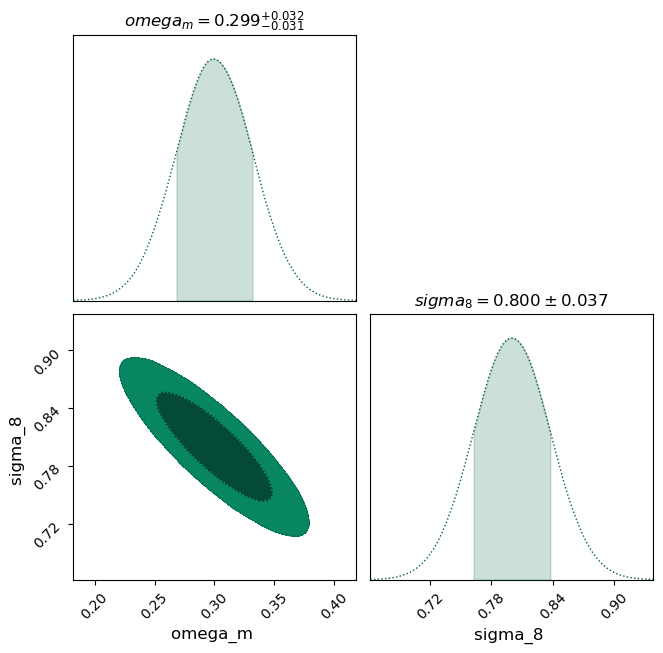

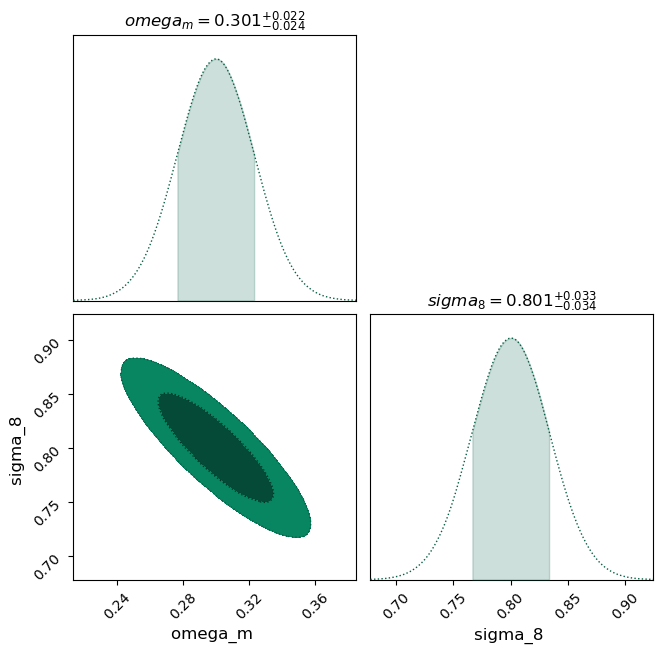

In [30]:
my_plotter = plotter()

my_plotter._plot_chain_from_covariance(fij, params_fisher, params_label=None, set_name = "set 1")

my_plotter._plot_chain_from_covariance(fij_int, params_fisher, params_label=None, set_name = "set 2")

In [21]:
params_fisher

Ellipsis

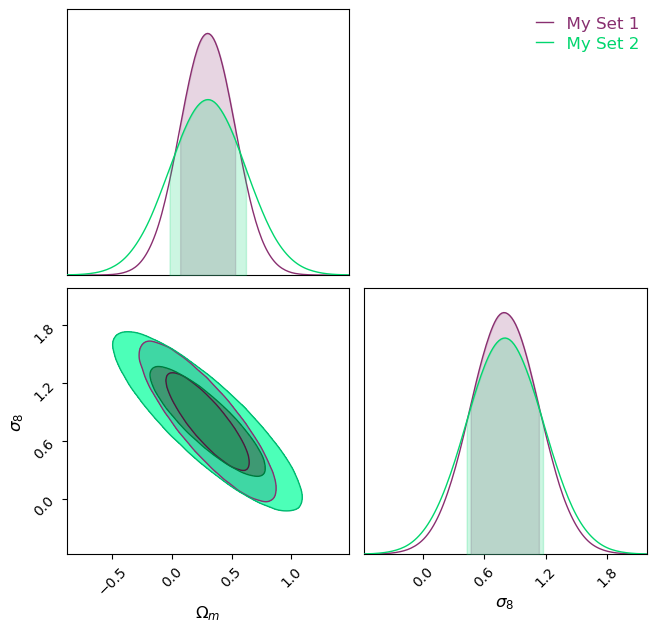

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from chainconsumer import Chain, ChainConsumer  # Assuming you have the necessary package installed


color_list =[
"#892f70",
"#01d66e",
"#4c7cff",
"#d54708",
"#69d6dc",
"#953112",
"#b7b5ff",
"#7a5900",
"#ff669e",
"#ff8e88"]



class plotter:
    @staticmethod
    def _plot_chain_from_covariance(Fisher_matrices, params_fishers, params_label=None, set_names=None):
        if not isinstance(Fisher_matrices, list):
            raise ValueError("Fisher_matrices must be a list of Fisher matrices")
        if len(Fisher_matrices) != len(params_fishers):
            raise ValueError("Length of Fisher_matrices and params_fishers must be the same")
        
        if params_label is None:
            params_label = list(params_fishers[0].keys())
        else:
            params_label = params_label

        c = ChainConsumer()

        for idx, (Fisher_matrix, params_fisher) in enumerate(zip(Fisher_matrices, params_fishers)):
            if set_names is None:
                set_name = f"set {idx + 1}"
            else:
                set_name = set_names[idx] if idx < len(set_names) else f"set {idx + 1}"

            params_fisher_names = list(params_fisher.keys())
            mean = list(params_fisher.values())
            
            cov_3d = np.linalg.inv(Fisher_matrix)

            chain_plot = Chain.from_covariance(
                mean,
                cov_3d,
                columns=params_label,
                name= set_name,
                color=color_list[idx],
                labels= params_label,
                linestyle="-",
            )
            c.add_chain(chain_plot)

        fig = c.plotter.plot()

# Example usage:
# Instantiate the plotter object
my_plotter = plotter()

# Example parameters for the plot
Fisher_matrices = [fij_int, fij]  # Your list of Fisher matrices
params_fishers = [params_fisher, params_fisher]  # Your list of parameter values
set_names = ["My Set 1", "My Set 2"]  # Your list of set names

#params_label ={"omega_m" : r"$\omega_m$", "sigma_8" : r"$\sigma_8$"}

params_label =[r"$\Omega_m$",  r"$\sigma_8$"]

# Call the _plot_chain_from_covariance method
my_plotter._plot_chain_from_covariance(Fisher_matrices, params_fishers, set_names=set_names, params_label=params_label)


In [ ]:
def compute_derivatives_pk3d_interlopers(
                      k_values,
                      z,
                      params_fisher, 
                      line_name='CII158',
                      sfr_model="Silva15",
                      model_name ="Alma_scalling",
                      nu_obs=410, 
                      dnu_obs=40,
                      zlim=10):
    
    
    param_numbers=len(params_fisher)
    dcldp=[]
    
    for i in range(param_numbers):
        p=list(params_fisher.keys())[i]
        print("varying :", p)
        params_deriv = params_fisher.copy()	
        params_deriv[p] = params_deriv[p] + steps[p]
        
        updated_params = {
        key: params_deriv[key] if key in params_deriv else cosmo_params_inputs[key]
        for key in cosmo_params_inputs}
        
        cosmo_setup = cosmos.cosmo(h = updated_params['h'],
                                    omega_lambda = updated_params['omega_lambda'],
                                    omega_b = updated_params['omega_b'],
                                    omega_m = updated_params['omega_m'],
                                    tau = updated_params['tau'],
                                    ns = updated_params['ns'],
                                    sigma_8 = updated_params['sigma_8'],
                                    halo_model = updated_params['halo_model'],
                                    halo_mass_def = updated_params['halo_mass_def'],
                                    M_min = updated_params['M_min'],
                                    M_max = updated_params['M_max'],
                                    delta_c = updated_params['delta_c'],
                                    bias_model = updated_params['bias_model'],
                                    bias_mass_def = updated_params['bias_mass_def'])


        
        pk_plus =  pk3d_interloper(k_values,
                                 model_name=model_name,
                                 line_name=line_name,
                                 sfr_model =sfr_model, 
                                 params_fisher=params_deriv,
                                 nu_obs= nu_obs, 
                                 dnu_obs = dnu_obs,
                                 zlim= zlim)

        
        del params_deriv
        del updated_params
        
        
        
        
        params_deriv = params_fisher.copy()
        params_deriv[p] = params_deriv[p] - steps[p] 
        
        updated_params = {
        key: params_deriv[key] if key in params_deriv else cosmo_params_inputs[key]
        for key in cosmo_params_inputs}
        
        cosmo_setup = cosmos.cosmo(h = updated_params['h'],
                                    omega_lambda = updated_params['omega_lambda'],
                                    omega_b = updated_params['omega_b'],
                                    omega_m = updated_params['omega_m'],
                                    tau = updated_params['tau'],
                                    ns = updated_params['ns'],
                                    sigma_8 = updated_params['sigma_8'],
                                    halo_model = updated_params['halo_model'],
                                    halo_mass_def = updated_params['halo_mass_def'],
                                    M_min = updated_params['M_min'],
                                    M_max = updated_params['M_max'],
                                    delta_c = updated_params['delta_c'],
                                    bias_model = updated_params['bias_model'],
                                    bias_mass_def = updated_params['bias_mass_def'])
        
        
        
        pk_minus = pk3d_interloper(k_values,
                                                 model_name=model_name,
                                                 line_name=line_name,
                                                 sfr_model =sfr_model, 
                                                 params_fisher=params_deriv,
                                                 nu_obs= nu_obs, 
                                                 dnu_obs = dnu_obs,
                                                 zlim= zlim)
        
        
        dcldp_cal=(pk_plus - pk_minus)/ (2. * steps[p])
        dcldp.append(dcldp_cal)
        
        del params_deriv
        
    return dcldp
        

    
    

In [ ]:
import numpy as np

class LimFisher:
    """
    Class for Fisher matrix calculations related to cosmological parameters.

    Parameters:
        k_values : array_like
            Array of wavenumbers.
        z : float
            Redshift.
        params_fisher : dict
            Dictionary containing parameter names and their values.
        line_name : str, optional
            Name of the spectral line, default is 'CII158'.
        sfr_model : str, optional
            Star formation rate model, default is "Silva15".
        model_name : str, optional
            Name of the model, default is "Alma_scalling".
        step_size : float, optional
            Step size for parameter variation, default is 50.
    """
    
    def __init__(self, k_values, z, params_fisher, line_name='CII158', sfr_model="Silva15", model_name="Alma_scalling", step_size=50):
        self.k_values = k_values
        self.z = z
        self.params_fisher = params_fisher
        self.line_name = line_name
        self.sfr_model = sfr_model
        self.model_name = model_name
        self.step_size = step_size

    def configure_params_fisher(self):
        """
        Configure Fisher parameters and steps for parameter variation.

        Returns:
            dict: Fisher parameters.
            dict: Steps for parameter variation.
        """
        steps = {key: self.step_size for key in self.params_fisher}
        return self.params_fisher, steps

    

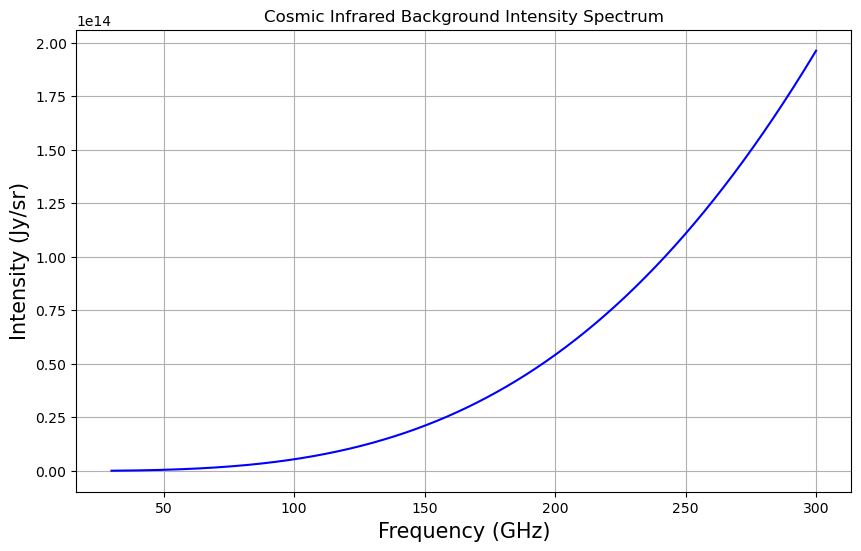

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.62607015e-34  # Planck constant in m^2 kg / s
c = 299792458       # Speed of light in m/s
k_B = 1.380649e-23  # Boltzmann constant in m^2 kg / s^2 K

# Define frequency range (in Hz)
freq = np.linspace(30e9, 300e9, 1000)  # 30 to 300 GHz, 1000 points

# Define temperature and emissivity parameters for the modified blackbody spectrum
T = 20.0  # Temperature of dust grains in Kelvin
beta = 1.5  # Emissivity index

# Calculate the intensity spectrum using the modified blackbody spectrum formula
I_nu = (2 * h * freq**3 / c**2) * (1 / (np.exp(h * freq / (k_B * T)) - 1))

# Apply the emissivity index beta
I_nu *= (freq / 1e9)**beta

# Plot the intensity spectrum
plt.figure(figsize=(10, 6))
plt.plot(freq / 1e9, I_nu * 1e26, color='blue')  # Convert intensity to Jansky
plt.xlabel('Frequency (GHz)')
plt.ylabel('Intensity (Jy/sr)')
plt.title('Cosmic Infrared Background Intensity Spectrum')
plt.grid(True)
plt.show()


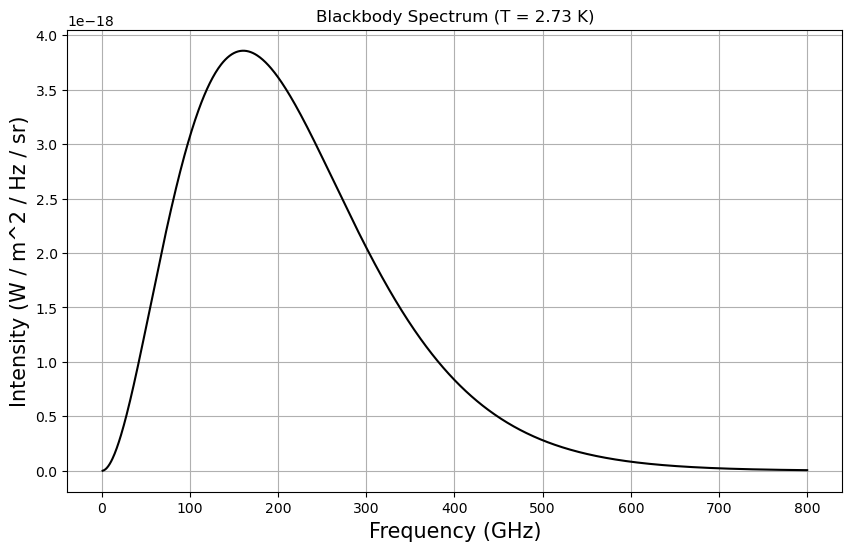

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
h = 6.62607015e-34  # Planck constant in m^2 kg / s
c = 299792458       # Speed of light in m/s
k_B = 1.380649e-23  # Boltzmann constant in m^2 kg / s^2 K

# Define frequency range (in Hz)
freq_GHz = np.linspace(1e0, 800, 1000)  # 1 GHz to 800 GHz, 1000 points

# Convert frequency to Hz
freq = freq_GHz * 1e9

# Temperature
T = 2.73  # Temperature in Kelvin

# Calculate the blackbody spectrum using Planck's law
I_nu = (2 * h * freq**3 / c**2) / (np.exp(h * freq / (k_B * T)) - 1)

# Plot the blackbody spectrum
plt.figure(figsize=(10, 6))
plt.plot(freq_GHz, I_nu, color='black')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Intensity (W / m^2 / Hz / sr)')
plt.title('Blackbody Spectrum (T = 2.73 K)')
plt.grid(True)
plt.show()
